## EXAMEN DE LABORATORIO REGRESION LINEAL MULTIPLE
## Univ. Villca Jaita Lino Fernando - Ing. Cs. de la Computación

En  este laboratorio utilizaremos el dataset: **Mars Asteroid Observation** que nos permitira predecir con conjunto de datos para predecir con precisión los días de observación (denominados 'data_arc' en los datos) necesarios para capturar las características del asteroide que cruza el planeta Marte..
*   https://www.kaggle.com/datasets/sanskar457/observation-days-dataset/
*   Formato: .csv



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

#importando pandas para poder manejar nuestro dataset
import pandas as pd

In [4]:
# Cargar el dataset
#Importamos la libreria pandas para poder manipular nuestros datos que son literales y poder cambiarlos a numericos
import pandas as pd

# Cargar el dataset
data = pd.read_csv('/content/drive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL 2024/EXAMEN LABORATORIO/final_observation_days.csv', delimiter=',')

In [5]:
#pd.set_option('display.max_columns', None)
#data

In [6]:
print(data)

          ID            full_name       sigma_e       sigma_a    sigma_i  \
0      11674           (2013 OV4)  5.756300e-08  1.605300e-08   0.000010   
1      10222         (2011 QH117)  3.958900e-06  4.475300e-07   0.000021   
2      15475         (2016 AQ193)  7.510200e-01  1.280000e+00  15.770000   
3      11743          (2013 PB88)  1.572900e-07  1.930200e-07   0.000027   
4       3226   380393 (2002 XL63)  5.860500e-08  1.539100e-08   0.000007   
...      ...                  ...           ...           ...        ...   
17995  13164         (2014 QF497)  1.123900e-07  1.888900e-08   0.000009   
17996  16276          (2016 PS66)  1.326000e-06  7.625200e-09   0.000018   
17997  19180           (2018 TJ2)  1.987300e-05  1.230400e-04   0.000223   
17998  11119          (2012 UL61)  1.387300e-07  1.786900e-08   0.000016   
17999   7671         (2005 UM157)  1.452500e-06  2.702400e-07   0.000070   

       sigma_om    sigma_w   sigma_ma      sigma_ad       sigma_n  ...  \
0      0.0000

In [7]:
print(data.dtypes)

ID                  int64
full_name          object
sigma_e           float64
sigma_a           float64
sigma_i           float64
sigma_om          float64
sigma_w           float64
sigma_ma          float64
sigma_ad          float64
sigma_n           float64
sigma_tp          float64
sigma_per         float64
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
ad                float64
q                 float64
per_y             float64
n_obs_used          int64
ma                float64
condition_code    float64
H                 float64
epoch_mjd           int64
data_arc          float64
dtype: object


In [8]:
# sigma_e, sigma_a, sigma_i, sigma_om, sigma_w, sigma_ma, sigma_ad, sigma_n, sigma_tp, sigma_per:
# Son desviaciones estándar de diversas características observadas en años anteriores.
columnas_a_eliminar = ['ID','full_name', 'epoch_mjd', 'condition_code']
dataset = data.drop(columns=columnas_a_eliminar)
#dataset

In [9]:
# Supongamos que df es tu DataFrame y quieres eliminar las columnas 'columna1' y 'columna2'
# Id porque es innecesario considerar un identificador - full_name es un atributo de asignacion arbitraria
# epoch_mjd: es el instante de tiempo en el que se utilizaron los vectores de posición y velocidad para calcular las características.
# condition_code: Es un código que indica la calidad y fiabilidad de los datos orbitales del objeto.
#columnas_a_eliminar = ['ID','full_name', 'epoch_mjd', 'condition_code']
#dataset = data.drop(columns=columnas_a_eliminar)
#dataset

In [10]:
dataset.dtypes

sigma_e       float64
sigma_a       float64
sigma_i       float64
sigma_om      float64
sigma_w       float64
sigma_ma      float64
sigma_ad      float64
sigma_n       float64
sigma_tp      float64
sigma_per     float64
a             float64
e             float64
i             float64
om            float64
w             float64
ad            float64
q             float64
per_y         float64
n_obs_used      int64
ma            float64
H             float64
data_arc      float64
dtype: object

In [11]:
#Elimina las filas donde haya campos vacios
datasv = dataset.dropna()

In [12]:
#mostramos los datos consistentes despues de eliminar.
#datasv.count()

In [13]:
#verificamos que todas las columnas esten en los tipos de datos correspondientes
#print(datasv.dtypes) #Total 17722 ejemplos consistentes incluyendo a la y a predecir

Asignacion de los datos a las variables

In [14]:
#muestra el numero de filas y columnas del dataset
datasv.shape

(17722, 22)

In [15]:
#al ser 17722 ejemplos tomaremos el 80% que es 14178 y de entrenamiento el 20% restante que es 3544 ejemplos

In [16]:
#ajustamos el dataset eliminas la ultima columna del dataset que es datesale (Fecha de venta porque en nuestro ejemplo no es importante considerar)
#data.drop(columns=['saledate'], inplace=True)
# Seleccionar las columnas deseadas en X
X = datasv.iloc[:, :-1]
X_test = datasv.iloc[14177:, :-1]


# Seleccionar la columna 'data_arc' en y
y = datasv.iloc[:, -1]
y_test = datasv.iloc[14177:, -1]
# Obtener el tamaño de y
m = y.size

print(X)
print(y)
print(m)

            sigma_e       sigma_a    sigma_i  sigma_om    sigma_w   sigma_ma  \
0      5.756300e-08  1.605300e-08   0.000010  0.000030   0.000035   0.000017   
1      3.958900e-06  4.475300e-07   0.000021  0.000217   0.002209   0.001641   
2      7.510200e-01  1.280000e+00  15.770000  4.632200  13.312000  90.643000   
3      1.572900e-07  1.930200e-07   0.000027  0.000016   0.000186   0.000228   
4      5.860500e-08  1.539100e-08   0.000007  0.000063   0.000064   0.000014   
...             ...           ...        ...       ...        ...        ...   
17995  1.123900e-07  1.888900e-08   0.000009  0.000077   0.000127   0.000066   
17996  1.326000e-06  7.625200e-09   0.000018  0.000073   0.000734   0.000324   
17997  1.987300e-05  1.230400e-04   0.000223  0.001945   0.009581   0.027074   
17998  1.387300e-07  1.786900e-08   0.000016  0.000016   0.000085   0.000056   
17999  1.452500e-06  2.702400e-07   0.000070  0.000046   0.002415   0.001005   

           sigma_ad       sigma_n    si

In [17]:
X.shape

(17722, 21)

In [18]:
#normalizar es convertir a la misma escala los datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [19]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

            sigma_e       sigma_a    sigma_i  sigma_om    sigma_w   sigma_ma  \
0      5.756300e-08  1.605300e-08   0.000010  0.000030   0.000035   0.000017   
1      3.958900e-06  4.475300e-07   0.000021  0.000217   0.002209   0.001641   
2      7.510200e-01  1.280000e+00  15.770000  4.632200  13.312000  90.643000   
3      1.572900e-07  1.930200e-07   0.000027  0.000016   0.000186   0.000228   
4      5.860500e-08  1.539100e-08   0.000007  0.000063   0.000064   0.000014   
...             ...           ...        ...       ...        ...        ...   
17995  1.123900e-07  1.888900e-08   0.000009  0.000077   0.000127   0.000066   
17996  1.326000e-06  7.625200e-09   0.000018  0.000073   0.000734   0.000324   
17997  1.987300e-05  1.230400e-04   0.000223  0.001945   0.009581   0.027074   
17998  1.387300e-07  1.786900e-08   0.000016  0.000016   0.000085   0.000056   
17999  1.452500e-06  2.702400e-07   0.000070  0.000046   0.002415   0.001005   

           sigma_ad       sigma_n    si

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

In [20]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
Xf = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [21]:
Xf.shape

(17722, 22)

In [22]:
print(Xf)

[[ 1.00000000e+00 -1.48496885e-02 -1.51048668e-02 ... -3.45476932e-02
  -4.56493711e-01 -1.14053718e+00]
 [ 1.00000000e+00 -1.48496082e-02 -1.51048636e-02 ... -6.22945072e-01
   7.07737418e-01  7.86221789e-01]
 [ 1.00000000e+00  6.03811553e-04 -5.71024473e-03 ... -6.94265967e-01
  -1.12399111e+00  1.10985057e+00]
 ...
 [ 1.00000000e+00 -1.48492808e-02 -1.51039639e-02 ... -5.75397809e-01
  -1.25413320e+00  1.11985971e+00]
 [ 1.00000000e+00 -1.48496869e-02 -1.51048668e-02 ... -4.98133507e-01
  -9.18907071e-01  6.19402831e-01]
 [ 1.00000000e+00 -1.48496598e-02 -1.51048649e-02 ... -4.92190099e-01
  -1.29614357e+00  7.86221789e-01]]


In [23]:
def computeCostMulti(Xf, y, theta, lambda_):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(Xf, theta)

    J = (1 / (2 * m)) * np.sum(np.square(np.dot(Xf, theta) - y)) + (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))

    return J


In [24]:
#alpha es el coeficiente de aprendizaje es cuanto aumento o resto del error que surge del costo para que la linea tienda a ser horizontal o palalelo al eje x,
#por eso tiene un valor pequeño, que va incrementando o decrementando poco a poco.
def gradientDescentMulti(Xf, y, theta, alpha, num_iters,lambda_):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        h = np.dot(Xf, theta)
        theta = theta - (alpha / m) * (np.dot(Xf.T, (h - y))) - (alpha * lambda_ / m) * np.concatenate(([0], theta[1:]))  # Regularización
        J_history.append(computeCostMulti(Xf, y, theta, lambda_))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


In [28]:
datasv.shape

(17722, 22)

In [29]:
Xf.shape

(17722, 22)

theta calculado por el descenso por el gradiente: [ 4.18440959e+03 -9.16617224e+00 -3.54921125e+00 -2.11047187e+01
  1.51321128e+01  1.68070529e+01  1.09177476e+01 -2.19106833e+00
 -1.15139278e+01  4.26069432e-01 -2.19982924e+00 -1.53805770e+02
 -1.24167164e+02 -4.97686967e+02 -4.24062587e+01 -1.93218534e+01
 -1.65310282e+02  1.01344975e+02 -1.65681592e+02  7.61427811e+02
 -2.29375594e+01 -1.54171138e+03]


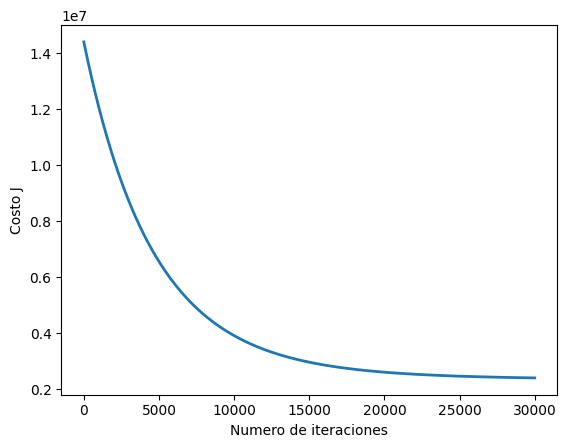

In [30]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 30000
lambda_ = 0.1

#0.0001 30000 0.1 ---> 54.41%

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(22)

theta, J_history = gradientDescentMulti(Xf, y, theta, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [31]:
#con nuestras thetas encontradas procedemos al prediccion
# Calculamos las predicciones
predic = np.dot(Xf, theta)

# Calculamos el coeficiente de determinación (R^2)
ssr = np.sum((predic - y.mean()) ** 2)  # Suma de los cuadrados de la regresión
sst = np.sum((y - y.mean()) ** 2)  # Suma total de los cuadrados
r_squared = 1 - (ssr / sst)

# Convertimos R^2 a porcentaje
precmod = r_squared * 100

print('Precisión del modelo en el conjunto de entrenamiento: {:.2f}%'.format(precmod))

Precisión del modelo en el conjunto de entrenamiento: 54.60%


HASTA AQUI EL ENTRENAMIENTO

ENTRENAMIENTO

In [32]:
#tomamos los datos de test en la linea 14 del codigo
# Tomamos los últimos 1000 ejemplos del dataset para realizar el test
#X_test = datasv.iloc[-1000:, :-1]
#y_test = datasv.iloc[-1000:, -1]

In [33]:
# Normalizamos los datos de test utilizando mu y sigma calculados previamente en los datos de entrenamiento
X_test_norm = (X_test - mu) / sigma

In [34]:
# Añadimos el término de intersección a X_test
X_test_f = np.concatenate([np.ones((X_test_norm.shape[0], 1)), X_test_norm], axis=1)


In [35]:
# Calculamos las predicciones en el conjunto de test
predic_test = np.dot(X_test_f, theta)

In [36]:
# Calculamos el coeficiente de determinación (R^2) para evaluar la precisión en el conjunto de test
ssr_test = np.sum((predic_test - y_test.mean()) ** 2)  # Suma de los cuadrados de la regresión
sst_test = np.sum((y_test - y_test.mean()) ** 2)  # Suma total de los cuadrados
r_squared_test = 1 - (ssr_test / sst_test)

# Convertimos R^2 a porcentaje
percentage_test = r_squared_test * 100

print('Precisión del modelo en el conjunto de test: {:.2f}%'.format(percentage_test))

Precisión del modelo en el conjunto de test: 55.85%


FIN ENTRENAMIENTO

IMPRESION DE RESULTADOS

In [37]:
# Imprimimos los últimos valores reales de y_test
print("Últimos 10 valores reales de y_test:")
print(y_test)

# Imprimimos los últimos valores predichos
print("\nÚltimos 10 valores predichos:")
print(predic_test)


Últimos 10 valores reales de y_test:
14400    3594.0
14401    4751.0
14402    4738.0
14403    2548.0
14404    2631.0
          ...  
17995    7975.0
17996    5137.0
17997      92.0
17998    3663.0
17999    4781.0
Name: data_arc, Length: 3545, dtype: float64

Últimos 10 valores predichos:
[4468.08566617 6995.06482195 5741.89515426 ... 1598.54149486 2657.07802791
 2432.77003748]
